<a href="https://colab.research.google.com/github/plambson/AZ_vs_NY_Covid/blob/master/Well_Forecast_Simple_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Well Forecast Daily Line
Create a simple line forecast for pageviews to understand The Well performance in 2020 and expectation against trend

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from google.colab import auth
auth.authenticate_user()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
goal = 2000000
days = pd.date_range(start='1/1/2020', end='12/31/2020')
goal_day = goal/days.shape[0]
annual = pd.DataFrame( index = days)
annual['goal_day'] = goal_day
annual.index.name = 'date'
annual['month'] = annual.index.strftime('%b')
annual['week'] = annual.index.strftime('%W')
annual['dow'] = annual.index.strftime('%w')

In [ ]:
# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'northwell-health-ga-2019'

well_pv = pd.io.gbq.read_gbq('''
    select 
    visitStartTime_DAY,
    sum(allPageViews) allPageViews
    from (
      SELECT
      date,
      EXTRACT(DATE FROM 
        DATETIME(TIMESTAMP_SECONDS(
            visitStartTime),'America/New_York')) visitStartTime_DAY,
      1 allPageViews,
      FROM `northwell-health-ga-2019.189952954`.`ga_sessions_*`, unnest(hits) h
      WHERE
      _TABLE_SUFFIX BETWEEN FORMAT_DATE('%Y%m%d',DATE_SUB(CURRENT_DATE(), INTERVAL 13 MONTH))
      AND FORMAT_DATE('%Y%m%d',DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY))
      and h.type = 'PAGE'
      and h.page.hostname = 'thewell.northwell.edu'
      ) A
    group by visitStartTime_DAY
    order by visitStartTime_DAY
''', project_id=project_id)


In [ ]:
well_pv.set_index(well_pv.visitStartTime_DAY,inplace=True, drop=True)
well_pv.drop(columns=['visitStartTime_DAY'], inplace=True)


In [ ]:
annual = annual.join(well_pv,how='inner')

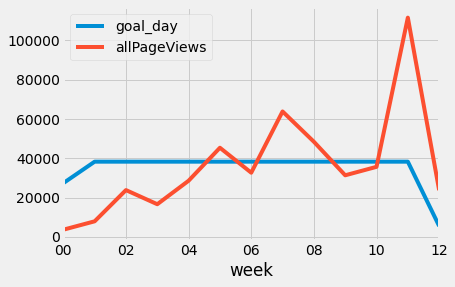

In [ ]:
annual[['goal_day','allPageViews']].groupby(annual['week']).sum().plot()

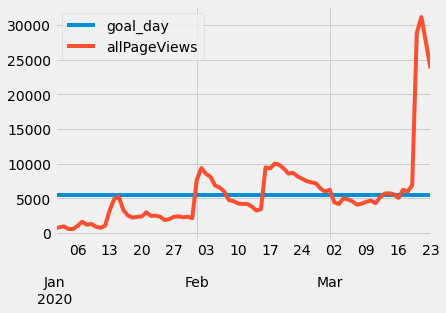

In [ ]:
annual[['goal_day','allPageViews']].plot()

In [ ]:
annual[['goal_day','allPageViews']]

,goal_day,allPageViews
2020-01-01,5464.480874,680
2020-01-02,5464.480874,819
2020-01-03,5464.480874,954
2020-01-04,5464.480874,590
2020-01-05,5464.480874,566
...,...,...
2020-03-19,5464.480874,6892
2020-03-20,5464.480874,28832
2020-03-21,5464.480874,31139
2020-03-22,5464.480874,27466


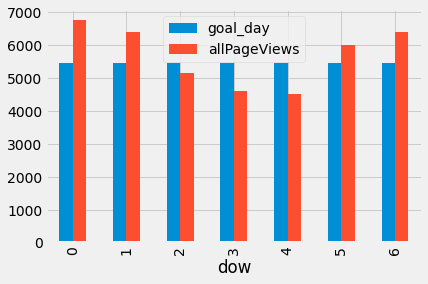

In [ ]:
annual[['goal_day','allPageViews']].groupby(annual['dow']).mean().plot.bar()